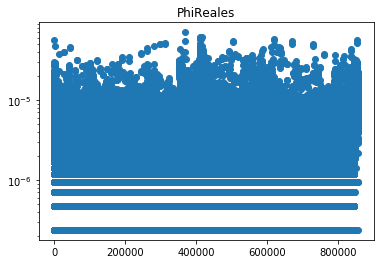

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from leerArchivos import *

%matplotlib inline

pps, phiReales = obtenerPPS('PPS.log')
tiempos, phiLocales, phiAjustados, rtts = obtenerMediciones('measurements.log')

plt.semilogy()
plt.plot(phiReales, 'o')
plt.title('PhiReales')

plt.show()

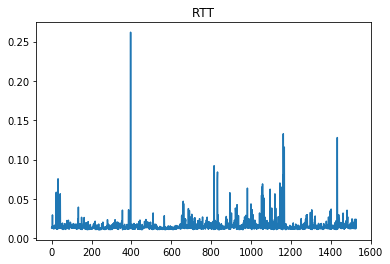

In [2]:
plt.plot(rtts)

plt.title('RTT')
plt.show()

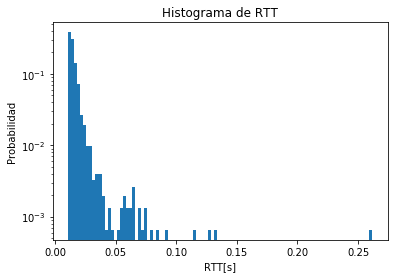

In [3]:
pesos = np.ones_like(rtts)/len(rtts)
p, bins, patches = plt.hist(rtts, 100, weights=pesos)

plt.title('Histograma de RTT')
plt.ylabel('Probabilidad')
plt.xlabel('RTT[s]')

plt.semilogy()
plt.show()

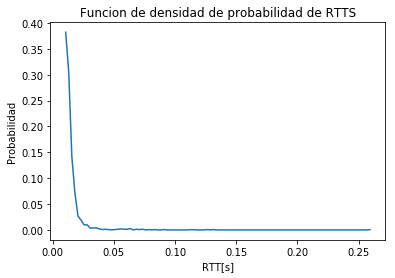

In [4]:
plt.plot(bins[0:len(p)], p)
plt.title('Funcion de densidad de probabilidad de RTTS')
plt.ylabel('Probabilidad')
plt.xlabel('RTT[s]')

plt.show()

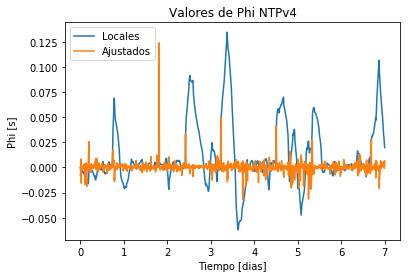

In [5]:
indice = np.arange(len(phiLocales))*(7/len(phiLocales)) 


plt.plot(indice, phiLocales, label='Locales')
plt.plot(indice, phiAjustados, label='Ajustados')

plt.title('Valores de Phi NTPv4')
plt.ylabel('Phi [s]')
plt.xlabel('Tiempo [dias]')
plt.legend()
plt.show()

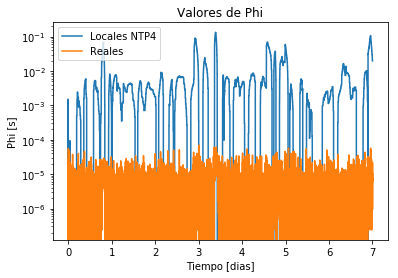

In [6]:
from acondicionamientoEntrada import *

indices = asignarMedicionesPPS(tiempos, pps)
phiRealesAcortada, phiLocalesExtendido, phiAjustadosExtendido = expandirMediciones(indices, phiReales, phiLocales, phiAjustados)

indiceTiempo = np.arange(len(phiLocalesExtendido))*(7/len(phiLocalesExtendido)) 

plt.semilogy()
plt.plot(indiceTiempo, phiLocalesExtendido, label='Locales NTP4')
plt.plot(indiceTiempo, phiRealesAcortada, label='Reales')

plt.ylabel('Phi [s]')
plt.xlabel('Tiempo [dias]')

plt.title('Valores de Phi')
plt.legend(loc='upper left')
plt.show()


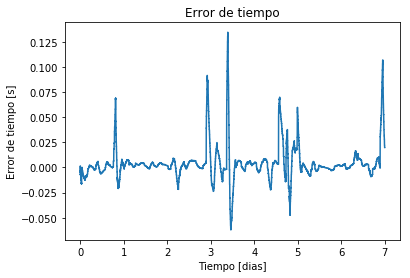

In [7]:
from evaluacion import *

TE = [x - y for x, y in zip(phiLocalesExtendido, phiRealesAcortada)]

plt.plot(indiceTiempo, TE)

plt.title("Error de tiempo")

plt.ylabel('Error de tiempo [s]')
plt.xlabel('Tiempo [dias]')
plt.show()

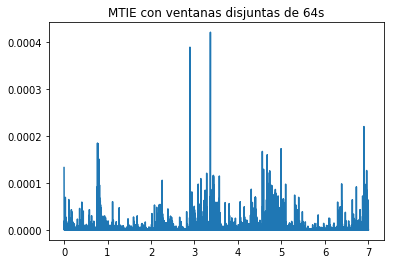

In [8]:
MTIE64 = calcularMTIE(64, phiLocalesExtendido, TE, pps, 64)
MTIE120 = calcularMTIE(120, phiLocalesExtendido, TE, pps, 120)
MTIE180 = calcularMTIE(180, phiLocalesExtendido, TE, pps, 180)
MTIE300 = calcularMTIE(300, phiLocalesExtendido, TE, pps, 300)

indiceTiempo = np.arange(len(MTIE64))*(7/len(MTIE64)) 
plt.plot(indiceTiempo, MTIE64)

plt.title("MTIE con ventanas disjuntas de 64s")
plt.show()


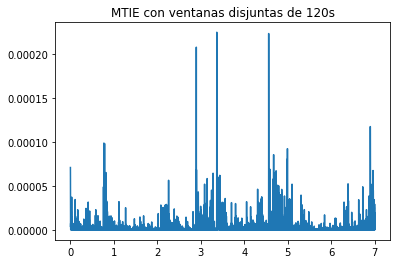

In [9]:
indiceTiempo = np.arange(len(MTIE120))*(7/len(MTIE120)) 
plt.plot(indiceTiempo, MTIE120)
plt.title("MTIE con ventanas disjuntas de 120s")
plt.show()

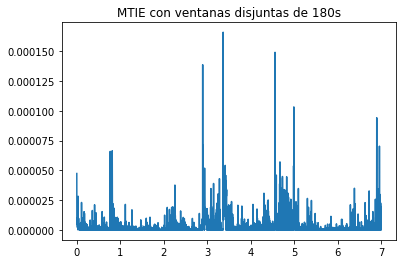

In [10]:
indiceTiempo = np.arange(len(MTIE180))*(7/len(MTIE180)) 
plt.plot(indiceTiempo, MTIE180)
plt.title("MTIE con ventanas disjuntas de 180s")
plt.show()

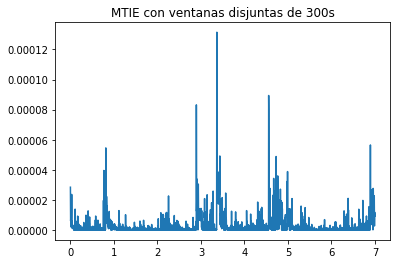

In [11]:
indiceTiempo = np.arange(len(MTIE300))*(7/len(MTIE300)) 
plt.plot(indiceTiempo, MTIE300)
plt.title("MTIE con ventanas disjuntas de 300s")
plt.show()

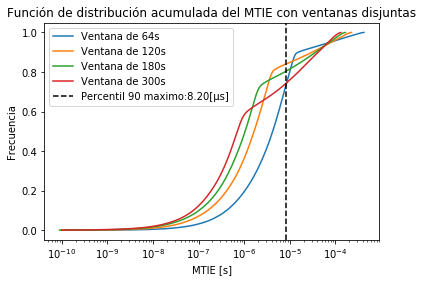

In [12]:
from graficos import *

graficarFda(MTIE64, plt, "Ventana de 64s", len(MTIE64))
graficarFda(MTIE120, plt, "Ventana de 120s", len(MTIE64))
graficarFda(MTIE180, plt, "Ventana de 180s", len(MTIE64))
graficarFda(MTIE300, plt, "Ventana de 300s", len(MTIE64))

plt.legend()
plt.semilogx()

plt.ylabel('Frecuencia')
plt.xlabel('MTIE [s]')

percentilMaximo = max([np.percentile(MTIE64, 90), 
                       np.percentile(MTIE120, 90),
                       np.percentile(MTIE180, 90),
                       np.percentile(MTIE300, 90)])

percentilMaximoMicrosegundos = percentilMaximo * 1e6
                       
plt.axvline(x=percentilMaximo, color='k', linestyle='--', label='Percentil 90 maximo:'+('%.2f' % percentilMaximoMicrosegundos)+'[μs]')
plt.legend()

plt.title("Función de distribución acumulada del MTIE con ventanas disjuntas")
plt.show()


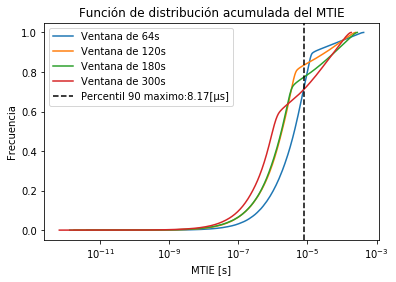

In [13]:
MTIE64 = calcularMTIE(64, phiLocalesExtendido, TE, pps, 2)
MTIE120 = calcularMTIE(120, phiLocalesExtendido, TE, pps, 2)
MTIE180 = calcularMTIE(180, phiLocalesExtendido, TE, pps, 2)
MTIE300 = calcularMTIE(300, phiLocalesExtendido, TE, pps, 2)

graficarFda(MTIE64, plt, "Ventana de 64s", len(MTIE64))
graficarFda(MTIE120, plt, "Ventana de 120s", len(MTIE64))
graficarFda(MTIE180, plt, "Ventana de 180s", len(MTIE64))
graficarFda(MTIE300, plt, "Ventana de 300s", len(MTIE64))

plt.legend()
plt.semilogx()

plt.ylabel('Frecuencia')
plt.xlabel('MTIE [s]')

percentilMaximo = max([np.percentile(MTIE64, 90), 
                       np.percentile(MTIE120, 90),
                       np.percentile(MTIE180, 90),
                       np.percentile(MTIE300, 90)])

percentilMaximoMicrosegundos = percentilMaximo * 1e6
                       
plt.axvline(x=percentilMaximo, color='k', linestyle='--', label='Percentil 90 maximo:'+('%.2f' % percentilMaximoMicrosegundos)+'[μs]')
plt.legend()

plt.title("Función de distribución acumulada del MTIE")
plt.show()